<a href="https://colab.research.google.com/github/vinaykotadiya/ev-adoption-forecast/blob/main/ZEV_Forcasting_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import re
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler

# **DATA CLEANING**

In [37]:
# read the uploaded file
df = pd.read_csv('df_VEH0120_UK.csv')

# show basic info
print("Rows and Columns:", df.shape)
df.head()

Rows and Columns: (208751, 49)


,BodyType,Make,GenModel,Model,Fuel,LicenceStatus,2025Q1,2024Q4,2024Q3,2024Q2,...,2016Q4,2016Q3,2016Q2,2016Q1,2015Q4,2015Q3,2015Q2,2015Q1,2014Q4,2014Q3
0,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR,Petrol,Licensed,15,14,15,16,...,0,0,0,0,0,0,0,0,0,0
1,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR,Petrol,SORN,4,5,4,3,...,0,0,0,0,0,0,0,0,0,0
2,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR AUTO,Petrol,Licensed,26,25,27,25,...,0,0,0,0,0,0,0,0,0,0
3,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR AUTO,Petrol,SORN,3,4,2,2,...,0,0,0,0,0,0,0,0,0,0
4,Cars,ABARTH,ABARTH SPIDER,124 SPIDER MULTIAIR,Petrol,Licensed,973,960,978,978,...,155,100,0,0,0,0,0,0,0,0


In [38]:
# check for missing values and duplicates
print("\nMissing values per column:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())


Missing values per column:
 BodyType         0
Make             0
GenModel         2
Model            0
Fuel             0
LicenceStatus    0
2025Q1           0
2024Q4           0
2024Q3           0
2024Q2           0
2024Q1           0
2023Q4           0
2023Q3           0
2023Q2           0
2023Q1           0
2022Q4           0
2022Q3           0
2022Q2           0
2022Q1           0
2021Q4           0
2021Q3           0
2021Q2           0
2021Q1           0
2020Q4           0
2020Q3           0
2020Q2           0
2020Q1           0
2019Q4           0
2019Q3           0
2019Q2           0
2019Q1           0
2018Q4           0
2018Q3           0
2018Q2           0
2018Q1           0
2017Q4           0
2017Q3           0
2017Q2           0
2017Q1           0
2016Q4           0
2016Q3           0
2016Q2           0
2016Q1           0
2015Q4           0
2015Q3           0
2015Q2           0
2015Q1           0
2014Q4           0
2014Q3           0
dtype: int64

Duplicate rows: 0


In [39]:
# remove duplicate and empty rows
df.drop_duplicates(inplace=True)
df.dropna(how='all', inplace=True)

In [40]:
# clean text data (remove spaces and fix case)
df['BodyType'] = df['BodyType'].str.strip().str.title()
df['Fuel'] = df['Fuel'].str.strip().str.title()
df['LicenceStatus'] = df['LicenceStatus'].str.strip().str.title()

In [41]:
# show unique values to understand data categories
print("\nDifferent BodyType:", df['BodyType'].unique())
print("\nDifferent Fuel:", df['Fuel'].unique())
print("\nDifferent LicenceStatus:", df['LicenceStatus'].unique())


Different BodyType: ['Cars' 'Heavy Goods Vehicles' 'Light Goods Vehicles' 'Other Vehicles'
 'Motorcycles' 'Buses And Coaches']

Different Fuel: ['Petrol' 'Battery Electric' 'Gas' 'Diesel' 'Hybrid Electric (Petrol)'
 'Plug-In Hybrid Electric (Petrol)' 'Hybrid Electric (Diesel)'
 'Plug-In Hybrid Electric (Diesel)' 'Other Fuel Types'
 'Range Extended Electric' 'Fuel Cell Electric']

Different LicenceStatus: ['Licensed' 'Sorn']


In [42]:
# filter only licensed fully electric cars
ev_types = ['Battery Electric', 'Fuel Cell Electric', 'Range Extended Electric']

df_cars = df[
    (df['BodyType'] == 'Cars') &
    (df['Fuel'].isin(ev_types)) &
    (df['LicenceStatus'] == 'Licensed')
].reset_index(drop=True)

In [43]:
# preview the filtered dataset
print(df_cars.shape)
df_cars.head()

(1359, 49)


,BodyType,Make,GenModel,Model,Fuel,LicenceStatus,2025Q1,2024Q4,2024Q3,2024Q2,...,2016Q4,2016Q3,2016Q2,2016Q1,2015Q4,2015Q3,2015Q2,2015Q1,2014Q4,2014Q3
0,Cars,ABARTH,ABARTH 500,500E,Battery Electric,Licensed,232,192,139,68,...,0,0,0,0,0,0,0,0,0,0
1,Cars,ABARTH,ABARTH 500,500E SCORPIONISSIMA,Battery Electric,Licensed,133,130,129,111,...,0,0,0,0,0,0,0,0,0,0
2,Cars,ABARTH,ABARTH 500,500E TURISMO,Battery Electric,Licensed,182,177,164,140,...,0,0,0,0,0,0,0,0,0,0
3,Cars,ABARTH,ABARTH 600E,600E,Battery Electric,Licensed,30,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Cars,ABARTH,ABARTH 600E,600E SCORPIONISSIMA,Battery Electric,Licensed,26,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
print("\nDifferent BodyType:", df_cars['BodyType'].unique())
print("\nDifferent Fuel:", df_cars['Fuel'].unique())
print("\nDifferent LicenceStatus:", df_cars['LicenceStatus'].unique())


Different BodyType: ['Cars']

Different Fuel: ['Battery Electric' 'Range Extended Electric' 'Fuel Cell Electric']

Different LicenceStatus: ['Licensed']


In [45]:
# save clean dataset
df_cars.to_csv('ev_cars_uk.csv', index=False)

In [46]:
# read the cleaned EV cars data
data = pd.read_csv('ev_cars_uk.csv')
print("Rows and Columns:", data.shape)
data.head()

Rows and Columns: (1359, 49)


,BodyType,Make,GenModel,Model,Fuel,LicenceStatus,2025Q1,2024Q4,2024Q3,2024Q2,...,2016Q4,2016Q3,2016Q2,2016Q1,2015Q4,2015Q3,2015Q2,2015Q1,2014Q4,2014Q3
0,Cars,ABARTH,ABARTH 500,500E,Battery Electric,Licensed,232,192,139,68,...,0,0,0,0,0,0,0,0,0,0
1,Cars,ABARTH,ABARTH 500,500E SCORPIONISSIMA,Battery Electric,Licensed,133,130,129,111,...,0,0,0,0,0,0,0,0,0,0
2,Cars,ABARTH,ABARTH 500,500E TURISMO,Battery Electric,Licensed,182,177,164,140,...,0,0,0,0,0,0,0,0,0,0
3,Cars,ABARTH,ABARTH 600E,600E,Battery Electric,Licensed,30,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Cars,ABARTH,ABARTH 600E,600E SCORPIONISSIMA,Battery Electric,Licensed,26,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **EDA**

In [47]:
# find all quarterly columns (like 2014Q3, 2014Q4, etc.)
quarter_columns = [col for col in data.columns if re.match(r'^\d{4}Q[1-4]$', col)]
print("Total quarters found:", len(quarter_columns))
print("Example columns:", quarter_columns[:6])

Total quarters found: 43
Example columns: ['2025Q1', '2024Q4', '2024Q3', '2024Q2', '2024Q1', '2023Q4']


In [48]:
# make a time series with total EVs per quarter
trend_data = data[quarter_columns].sum().reset_index()
trend_data.columns = ['Quarter', 'Registered_Cars']

# convert quarter to proper date (end of quarter)
trend_data['Quarter_End'] = pd.PeriodIndex(trend_data['Quarter'], freq='Q').to_timestamp(how='end')
trend_data = trend_data.sort_values('Quarter_End').set_index('Quarter_End')


In [49]:
# save this dataset for forecasting later
trend_data[['Registered_Cars']].to_csv('ev_trend.csv')
trend_data.head()

,Quarter,Registered_Cars
Quarter_End,,
2014-09-30 23:59:59.999999999,2014Q3,12392
2014-12-31 23:59:59.999999999,2014Q4,14571
2015-03-31 23:59:59.999999999,2015Q1,17267
2015-06-30 23:59:59.999999999,2015Q2,19291
2015-09-30 23:59:59.999999999,2015Q3,21683


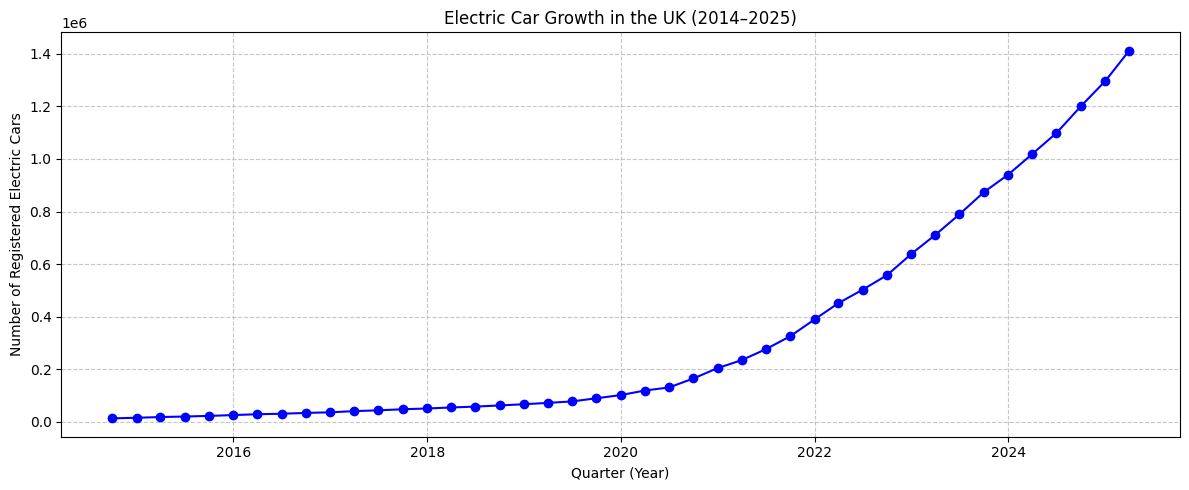

In [50]:
# make a line chart to show how electric cars increased over time
plt.figure(figsize=(12,5))

# plot total registered electric cars per quarter
plt.plot(trend_data.index, trend_data['Registered_Cars'], marker='o', color='blue')

# add title and axis labels
plt.title('Electric Car Growth in the UK (2014–2025)')
plt.xlabel('Quarter (Year)')     # time along the X-axis
plt.ylabel('Number of Registered Electric Cars')   # total EVs along Y-axis

# add light grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# adjust layout
plt.tight_layout()

# display the chart
plt.show()

In [51]:
# calculate quarter-to-quarter percentage growth
trend_data['Growth_Rate'] = trend_data['Registered_Cars'].pct_change() * 100

# calculate year-over-year percentage growth (compare to same quarter last year)
trend_data['YoY_Growth'] = trend_data['Registered_Cars'].pct_change(periods=4) * 100

# check that columns are created correctly
print(trend_data[['Registered_Cars', 'Growth_Rate', 'YoY_Growth']].head(10))

                               Registered_Cars  Growth_Rate  YoY_Growth
Quarter_End                                                            
2014-09-30 23:59:59.999999999            12392          NaN         NaN
2014-12-31 23:59:59.999999999            14571    17.583925         NaN
2015-03-31 23:59:59.999999999            17267    18.502505         NaN
2015-06-30 23:59:59.999999999            19291    11.721781         NaN
2015-09-30 23:59:59.999999999            21683    12.399565   74.975791
2015-12-31 23:59:59.999999999            24818    14.458331   70.324617
2016-03-31 23:59:59.999999999            28029    12.938190   62.326982
2016-06-30 23:59:59.999999999            29891     6.643120   54.947903
2016-09-30 23:59:59.999999999            33054    10.581780   52.442005
2016-12-31 23:59:59.999999999            35349     6.943184   42.432912


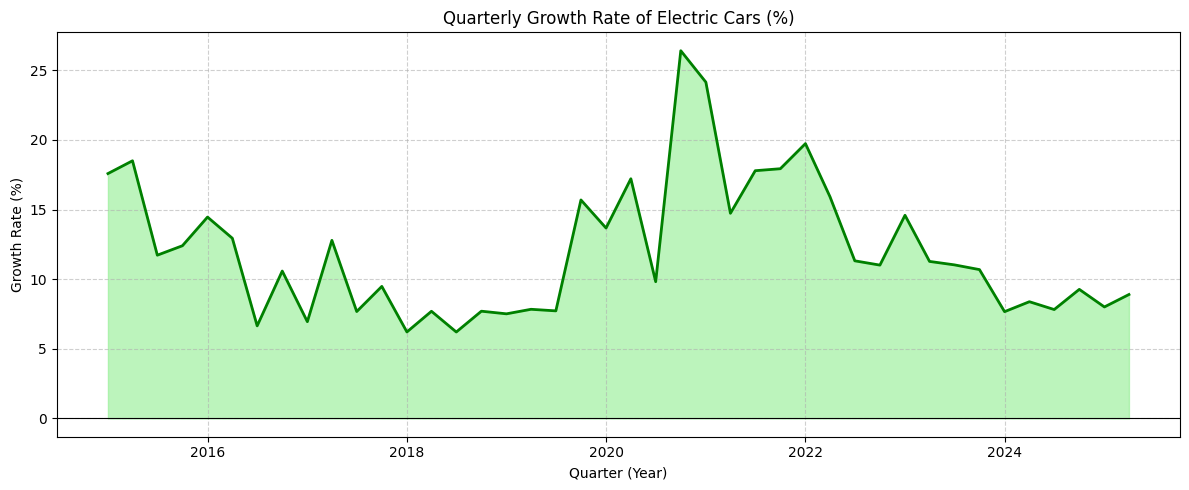

In [52]:
# area chart to show quarterly growth percentage of electric cars
plt.figure(figsize=(12,5))

# fill the area under the growth rate line with light green color
plt.fill_between(trend_data.index, trend_data['Growth_Rate'], color='lightgreen', alpha=0.6)

# draw the growth rate line on top of the area
plt.plot(trend_data.index, trend_data['Growth_Rate'], color='green', linewidth=2)

# add title and axis labels
plt.title('Quarterly Growth Rate of Electric Cars (%)')
plt.xlabel('Quarter (Year)')        # shows time
plt.ylabel('Growth Rate (%)')       # shows how fast EV adoption is growing

# add light grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# add a horizontal line at 0 to separate positive and negative growth
plt.axhline(0, color='black', linewidth=0.8)

# adjust spacing so labels
plt.tight_layout()

# display the final chart
plt.show()

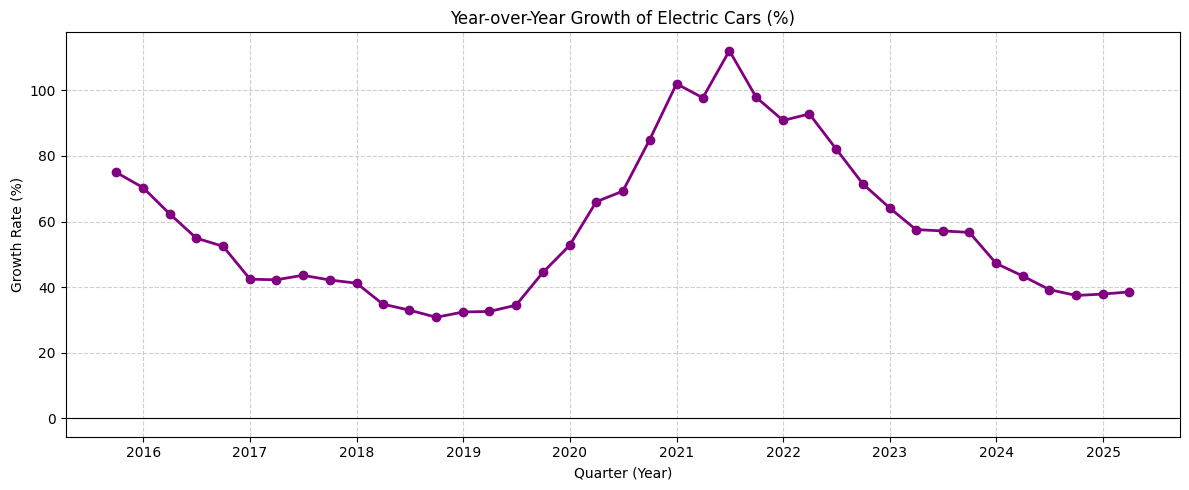

In [53]:
# make a line chart to show the yearly growth rate of electric cars
plt.figure(figsize=(12,5))

# plot the YoY growth line with purple color and dots on each point
plt.plot(trend_data.index, trend_data['YoY_Growth'], color='purple', linewidth=2, marker='o')

# add a clear title and axis labels
plt.title('Year-over-Year Growth of Electric Cars (%)')
plt.xlabel('Quarter (Year)')     # X-axis shows time (quarters)
plt.ylabel('Growth Rate (%)')    # Y-axis shows yearly growth percentage

# add light grid lines to make the chart easier to read
plt.grid(True, linestyle='--', alpha=0.6)

# add a horizontal line at 0% to show the baseline
plt.axhline(0, color='black', linewidth=0.8)

# fix spacing so titles and labels are not cut off
plt.tight_layout()

# show the final chart
plt.show()


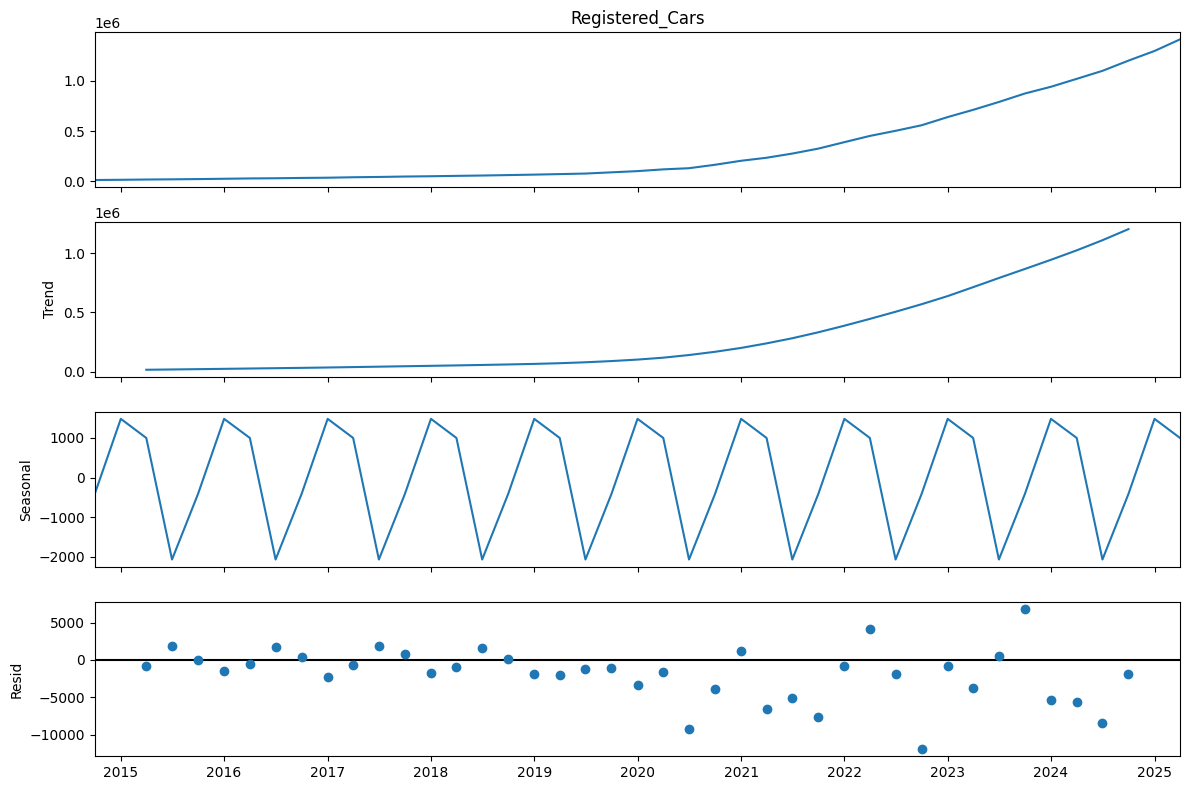

In [54]:
# check if we have enough quarters to see seasonality
if len(trend_data) >= 8:
    # break the data into 3 parts: trend, seasonal pattern, and random noise
    result = seasonal_decompose(trend_data['Registered_Cars'], model='additive', period=4)

    # plot all three parts together
    fig = result.plot()
    fig.set_size_inches(12,8)

    # adjust spacing so nothing is cut off
    plt.tight_layout()

    # show the final chart
    plt.show()
else:
    print("Not enough data points for seasonal analysis.")

#**PreProcessing**

In [55]:
# check if any missing values are present
print("\nMissing values per column:\n", trend_data.isnull().sum())


Missing values per column:
 Quarter            0
Registered_Cars    0
Growth_Rate        1
YoY_Growth         4
dtype: int64


In [56]:
# replace missing growth values with 0
trend_data[['Growth_Rate', 'YoY_Growth']] = trend_data[['Growth_Rate', 'YoY_Growth']].fillna(0)

# check again
print("\nAfter handling missing values:")
print(trend_data.isnull().sum())


After handling missing values:
Quarter            0
Registered_Cars    0
Growth_Rate        0
YoY_Growth         0
dtype: int64


In [57]:
# ensure datetime index
trend_data.index = pd.to_datetime(trend_data.index)

In [58]:
# create Prophet-compatible dataframe (ds, y) and save
prophet_df = trend_data.reset_index().rename(columns={'index':'ds', 'Registered_Cars':'y'})
prophet_df.to_csv('prophet_ev.csv', index=False)


In [59]:
# train/test split (last 8 quarters as test)
n_test = 8
train = trend_data.iloc[:-n_test].copy()
test  = trend_data.iloc[-n_test:].copy()
print("Train shape:", train.shape, "Test shape:", test.shape)

Train shape: (35, 4) Test shape: (8, 4)


In [60]:
# read the prophet-compatible dataset
prophet_df = pd.read_csv('prophet_ev.csv')

# display the dataframe
display(prophet_df)

,Quarter_End,Quarter,y,Growth_Rate,YoY_Growth
0,2014-09-30 23:59:59.999999999,2014Q3,12392,0.000000,0.000000
1,2014-12-31 23:59:59.999999999,2014Q4,14571,17.583925,0.000000
2,2015-03-31 23:59:59.999999999,2015Q1,17267,18.502505,0.000000
3,2015-06-30 23:59:59.999999999,2015Q2,19291,11.721781,0.000000
4,2015-09-30 23:59:59.999999999,2015Q3,21683,12.399565,74.975791
5,2015-12-31 23:59:59.999999999,2015Q4,24818,14.458331,70.324617
6,2016-03-31 23:59:59.999999999,2016Q1,28029,12.938190,62.326982
7,2016-06-30 23:59:59.999999999,2016Q2,29891,6.643120,54.947903
8,2016-09-30 23:59:59.999999999,2016Q3,33054,10.581780,52.442005
9,2016-12-31 23:59:59.999999999,2016Q4,35349,6.943184,42.432912
